<div style="padding: 35px;color:white;margin:10;font-size:200%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/7078619/pexels-photo-7078619.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'><strong>EABL STOCK PRICE PREDICTION </strong></span></b> </div> 

# Business Understanding:  
## Overview:  
East African Breweries Limited (EABL) has a rich history rooted in East Africa's economic and social fabric. Established in 1922, EABL has grown to become a leading beverage company, contributing significantly to the region's economy. Over the years, EABL has built a portfolio of iconic brands, becoming synonymous with quality and innovation in the brewing industry.EABL holds a pivotal role in the East African beverage market, offering a diverse range of alcoholic and non-alcoholic products. Its flagship brands, including Tusker Lager and Guinness, have become household names, reflecting the company's commitment to quality craftsmanship. Despite its historical success, East African Breweries Limited (EABL) has been facing significant challenges in the form of evolving regulatory landscapes. The recent government's directive to collect taxes within 24 hours after goods leave the store, influenced by the new Finance Act of 2023, has introduced a new layer of complexity. This has prompted investors and stakeholders to reevaluate their strategies in light of the changing regulatory landscape. To navigate this uncertainty, our goal is to provide investors with a comprehensive analysis and forecasting model for EABL's stock prices, incorporating various economic indicators and sentiments.

## Problem Statement:
The dynamic regulatory environment and recent government directives have created uncertainty in the market, affecting EABL's stock performance. Investors are seeking ways to cushion themselves from potential market crashes and make informed decisions in the face of evolving economic conditions. To address this, we aim to develop a multifaceted analysis, including time series forecasting, sentiment analysis, volatility insights, abnormal trade volume investigation, dividends analysis, trend analysis, and lag analysis of market indicators.

### <b> <span style='color:#16C2D5'>|</span> Challenges</b>
1. Regulatory Uncertainty: The recent changes in tax collection directives pose a challenge for EABL's financial stability. Understanding and predicting the impact of these changes on stock prices is challenging but crucial.

2. Data Integration: Incorporating diverse data sources like Twitter sentiments, inflation rates, exchange rates, unemployment rates, and dividends payout requires efficient data integration and cleaning to ensure the accuracy and reliability of the analysis.

3. Sentiment Analysis: Analyzing sentiments from various sources (Twitter, news articles, Instagram) poses the challenge of dealing with unstructured data and ensuring that sentiments are accurately captured and interpreted.

4. Market Volatility: Predicting stock prices and identifying potential risks related to EABL's stock volatility demands a robust model capable of handling the inherent unpredictability in financial markets.

5. Complexity of Market Indicators: Understanding the lag effects of market indicators such as inflation rates, GDP, USD exchange rates, and unemployment rates on EABL stocks requires a sophisticated analytical approach.

### <b> <span style='color:#16C2D5'>|</span> Objectives</b>
1. Time Series Forecasting:  
   Objective: Develop an accurate time series forecasting model for EABL's stock prices. Incorporate Twitter(Stocks) sentiments, inflation rates, exchange rates, yearly unemployment rates, and EABL dividends payout.

2. Sentiment Analysis:  
   Objective 1: Perform a sentiment analysis of EABL products as well as market sentiments (Twitter).  
   Objective 2: Conduct sentiment analysis on news articles and Instagram.  
   Objective 3: Identify key sentiment drivers.  

3. Viability Assessment:   
   Objective 1: Uncover EABL's stock volatility patterns for risk assessment.  
   Objective 2: Develop a risk model to identify and quantify potential risks for managing investment strategies.  
   Objective 3: Investigate abnormal trade volume spikes and analyze their causes and implications.  

4. Dividends Analysis:  
   Objective: Analyze the rates of EABL dividends payout.  

5. Trend Analysis:  
   Objective: Analyze trends, seasonality, and autocorrelation patterns in EABL stock data.  

6. Lag Analysis:  
   Objective: Analyze the lag effects of market indicators (inflation rates, GDP, USD exchange rates, unemployment rates) on EABL stocks.

### <b> <span style='color:#16C2D5'>|</span> Conclusion</b>
In conclusion, EABL's current challenges necessitate a comprehensive approach to provide investors with the insights needed to make informed decisions. By combining traditional financial indicators with emerging data sources and advanced analytics, we aim to offer a holistic view of the market dynamics surrounding EABL. The analysis will not only address current uncertainties but also equip investors with tools to anticipate and navigate future trends in the stock market.

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np
 
# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

# Time series models
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

# Machine learning models 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Data/EABL-2006-2024_JAN_STOCKS.csv')
df.head()

,Date,Open,High,Low,Close,Average,Volume
0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000
1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600
2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100
3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500
4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700


In [3]:
df.shape

(4319, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319 entries, 0 to 4318
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     4319 non-null   object 
 1   Open     4319 non-null   float64
 2   High     4319 non-null   float64
 3   Low      4319 non-null   float64
 4   Close    4319 non-null   float64
 5   Average  4319 non-null   float64
 6   Volume   4319 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 236.3+ KB


In [5]:
# Check the columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Average', 'Volume'], dtype='object')

We will then convert our 'Date' column to datetime format,then set it as index, which is beneficial for time series analysis.

In [6]:
# Removing extra space in the 'Date' column
df.columns = df.columns.str.strip()

# Convert 'Date' column to datetime object and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display the first few rows
df.head()

,Open,High,Low,Close,Average,Volume
Date,,,,,,
2024-01-31,104.00,111.00,104.0,110.0,106.00,42000
2024-01-30,105.00,105.00,101.0,104.0,104.00,15600
2024-01-29,105.00,105.00,99.0,103.5,100.00,596100
2024-01-26,116.25,116.25,100.0,100.0,104.50,60500
2024-01-25,119.75,120.00,118.0,118.0,118.25,5700


## Feature engineering
* **Calculate Daily Returns**

In [7]:
df['Daily_Return'] = df['Close'].pct_change()


Merge the stock price dataset with other relevant data sources, such as inflation rates, exchange rates, yearly unemployment rates, and EABL dividends payout.  
Below is the merged dataset:

In [8]:
# Load the data
df_final = pd.read_csv('Data/final_merge.csv')
#The first five rows
df_final.head()

,Unnamed: 0,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share
0,0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,NaN,6.9,161.0,1.00,0.0,NaN
1,1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,NaN,6.9,161.0,1.00,0.0,NaN
2,2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,NaN,6.9,162.0,1.00,0.0,NaN
3,3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,NaN,6.9,162.0,1.00,0.0,NaN
4,4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,NaN,6.9,163.0,1.75,0.0,NaN


In [9]:
# Drop the 'Unnamed:0' column
df_final = df_final.drop(columns=['Unnamed: 0'])
df_final.head()

,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share
0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,NaN,6.9,161.0,1.00,0.0,NaN
1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,NaN,6.9,161.0,1.00,0.0,NaN
2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,NaN,6.9,162.0,1.00,0.0,NaN
3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,NaN,6.9,162.0,1.00,0.0,NaN
4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,NaN,6.9,163.0,1.75,0.0,NaN


In [10]:
df_final.shape

(4353, 16)

In [11]:
df_final.dtypes

Date                         object
Open                        float64
High                        float64
Low                         float64
Close                       float64
Average                     float64
Volume                        int64
Month                         int64
Year                          int64
Day                           int64
Annual Average Inflation    float64
12-Month Inflation          float64
Mean                        float64
Amount                      float64
Dividends per share         float64
Earnings Per Share          float64
dtype: object

In [12]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      4353 non-null   object 
 1   Open                      4353 non-null   float64
 2   High                      4353 non-null   float64
 3   Low                       4353 non-null   float64
 4   Close                     4353 non-null   float64
 5   Average                   4353 non-null   float64
 6   Volume                    4353 non-null   int64  
 7   Month                     4353 non-null   int64  
 8   Year                      4353 non-null   int64  
 9   Day                       4353 non-null   int64  
 10  Annual Average Inflation  4332 non-null   float64
 11  12-Month Inflation        4353 non-null   float64
 12  Mean                      4341 non-null   float64
 13  Amount                    4241 non-null   float64
 14  Dividend

The date column has data type object but we will have to convert it to datetime.There are some missing values

In [13]:
# Convert 'Date' column to datetime dtype
df_final['Date'] = pd.to_datetime(df_final['Date'])

In [14]:
# Display the number of missing values in each column
missing_values = df_final.isnull().sum()

# Display the result
print(missing_values)

Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Average                       0
Volume                        0
Month                         0
Year                          0
Day                           0
Annual Average Inflation     21
12-Month Inflation            0
Mean                         12
Amount                      112
Dividends per share           0
Earnings Per Share           21
dtype: int64


The missing values are in these columns(**Annual Average Inflation** ;21, **Mean**;12, **Amount**;112, **Earnings per share**;21). We can handle missing values by:  
1. **Backward filling**  
For columns like 'Annual Average Inflation' and 'Earnings Per Share,' which are assumed to have a continuous nature, missing values will be filled using the backward-fill method. This means that missing values are filled with the previous known value in the column.This is particularly useful when the data has a time-dependent structure.   
2. **Mean Calculation**  
For columns like 'Mean' and 'Amount,' missing values will be filled with the mean of the available data in those columns.

In [15]:
# Backward Filling
df_final['Annual Average Inflation'].fillna(method='bfill', inplace=True)
df_final['Earnings Per Share'].fillna(method='bfill', inplace=True)

In [16]:
missing_values_after_ffill = df_final.isnull().sum()
print(missing_values_after_ffill)


Date                          0
Open                          0
High                          0
Low                           0
Close                         0
Average                       0
Volume                        0
Month                         0
Year                          0
Day                           0
Annual Average Inflation      0
12-Month Inflation            0
Mean                         12
Amount                      112
Dividends per share           0
Earnings Per Share            0
dtype: int64


In [17]:
# Fill missing values with mean for 'Mean' and 'Amount' columns
df_final['Mean'].fillna(df_final['Mean'].mean(), inplace=True)
df_final['Amount'].fillna(df_final['Amount'].mean(), inplace=True)


In [18]:
missing_values_after_mean_fill = df_final.isnull().sum()
print(missing_values_after_mean_fill)


Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Average                     0
Volume                      0
Month                       0
Year                        0
Day                         0
Annual Average Inflation    0
12-Month Inflation          0
Mean                        0
Amount                      0
Dividends per share         0
Earnings Per Share          0
dtype: int64


Now that missing values have been handled,we can check at the display of the first few rows of our dataset.

In [19]:
df_final.head()

,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share
0,2024-01-31,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,7.67,6.9,161.0,1.00,0.0,12.5
1,2024-01-30,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,7.67,6.9,161.0,1.00,0.0,12.5
2,2024-01-29,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,7.67,6.9,162.0,1.00,0.0,12.5
3,2024-01-26,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,7.67,6.9,162.0,1.00,0.0,12.5
4,2024-01-25,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,7.67,6.9,163.0,1.75,0.0,12.5


Set the 'Date' column as an index:

In [20]:
df_final.set_index('Date', inplace=True)

In [21]:
# Checking the summary statistics
df_final.describe()

,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share
count,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4.353000e+03,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000,4353.000000
mean,203.635883,207.014186,202.370549,204.744889,205.146393,2.414060e+05,6.506777,2014.888123,15.846083,7.442074,7.484930,95.214632,3.578201,7.530841,9.924918
std,59.757190,59.294976,58.374963,59.057081,59.117756,3.760951e+05,3.456001,5.011075,8.708632,3.200384,3.910925,18.498183,1.639922,2.145542,2.442106
min,0.000000,98.000000,93.500000,96.500000,97.500000,0.000000e+00,1.000000,2006.000000,1.000000,3.930000,1.850000,61.510600,1.000000,0.000000,5.200000
25%,156.000000,159.000000,155.000000,156.000000,156.250000,2.790000e+04,3.000000,2011.000000,8.000000,5.350000,5.300000,81.658300,2.400000,5.500000,9.080000
50%,187.500000,190.000000,186.000000,189.000000,189.000000,1.125000e+05,7.000000,2015.000000,16.000000,6.430000,6.430000,99.319700,3.000000,7.700000,9.550000
75%,250.000000,250.000000,247.000000,250.000000,250.000000,3.055000e+05,10.000000,2019.000000,23.000000,8.130000,8.030000,103.698900,5.500000,8.750000,11.320000
max,425.000000,426.000000,416.000000,420.000000,424.000000,5.916300e+06,12.000000,2024.000000,31.000000,17.070000,19.720000,163.000000,7.250000,12.000000,15.000000


In [22]:
df_final.head()

,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share
Date,,,,,,,,,,,,,,,
2024-01-31,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,7.67,6.9,161.0,1.00,0.0,12.5
2024-01-30,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,7.67,6.9,161.0,1.00,0.0,12.5
2024-01-29,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,7.67,6.9,162.0,1.00,0.0,12.5
2024-01-26,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,7.67,6.9,162.0,1.00,0.0,12.5
2024-01-25,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,7.67,6.9,163.0,1.75,0.0,12.5


In [23]:
df_merge = pd.read_csv('MergedData/final_merge.csv')
# Drop the 'Unnamed:0' column
df_merge = df_merge.drop(columns=['Unnamed: 0'])
df_merge.head()

,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share,Unemployment
0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,NaN,6.9,161.0,1.00,0.0,NaN,3.7
1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,NaN,6.9,161.0,1.00,0.0,NaN,3.7
2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,NaN,6.9,162.0,1.00,0.0,NaN,3.7
3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,NaN,6.9,162.0,1.00,0.0,NaN,3.7
4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,NaN,6.9,163.0,1.75,0.0,NaN,3.7


In [24]:
df_merge.shape

(4353, 17)

In [25]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4353 entries, 0 to 4352
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      4353 non-null   object 
 1   Open                      4353 non-null   float64
 2   High                      4353 non-null   float64
 3   Low                       4353 non-null   float64
 4   Close                     4353 non-null   float64
 5   Average                   4353 non-null   float64
 6   Volume                    4353 non-null   int64  
 7   Month                     4353 non-null   int64  
 8   Year                      4353 non-null   int64  
 9   Day                       4353 non-null   int64  
 10  Annual Average Inflation  4332 non-null   float64
 11  12-Month Inflation        4353 non-null   float64
 12  Mean                      4349 non-null   float64
 13  Amount                    4353 non-null   float64
 14  Dividend

In [26]:
# Display the number of missing values in each column
missing_values = df_merge.isnull().sum()

# Display the result
print(missing_values)

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Average                      0
Volume                       0
Month                        0
Year                         0
Day                          0
Annual Average Inflation    21
12-Month Inflation           0
Mean                         4
Amount                       0
Dividends per share          0
Earnings Per Share          21
Unemployment                 0
dtype: int64


There are several missing values, **Annual Average Inflation** has 21 missing values, **Mean** has 4 missing values and **Earnings Per Share** has 21 missing values. We will have to handle the missing values first.

In [27]:
# Backward Filling
df_merge['Annual Average Inflation'].fillna(method='bfill', inplace=True)
df_merge['Earnings Per Share'].fillna(method='bfill', inplace=True)

In [28]:
# Fill missing values with mean for 'Mean' column
df_merge['Mean'].fillna(df_final['Mean'].mean(), inplace=True)

In [29]:
# Check if the missing values have been handled
missing_values_after_correction = df_merge.isnull().sum()
print(missing_values_after_correction)


Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Average                     0
Volume                      0
Month                       0
Year                        0
Day                         0
Annual Average Inflation    0
12-Month Inflation          0
Mean                        0
Amount                      0
Dividends per share         0
Earnings Per Share          0
Unemployment                0
dtype: int64


In [30]:
# Display the clean dataset
df_merge.head()

,Date,Open,High,Low,Close,Average,Volume,Month,Year,Day,Annual Average Inflation,12-Month Inflation,Mean,Amount,Dividends per share,Earnings Per Share,Unemployment
0,1/31/2024,104.00,111.00,104.0,110.0,106.00,42000,1,2024,31,7.67,6.9,161.0,1.00,0.0,12.5,3.7
1,1/30/2024,105.00,105.00,101.0,104.0,104.00,15600,1,2024,30,7.67,6.9,161.0,1.00,0.0,12.5,3.7
2,1/29/2024,105.00,105.00,99.0,103.5,100.00,596100,1,2024,29,7.67,6.9,162.0,1.00,0.0,12.5,3.7
3,1/26/2024,116.25,116.25,100.0,100.0,104.50,60500,1,2024,26,7.67,6.9,162.0,1.00,0.0,12.5,3.7
4,1/25/2024,119.75,120.00,118.0,118.0,118.25,5700,1,2024,25,7.67,6.9,163.0,1.75,0.0,12.5,3.7


In [31]:
#Convert to datetime formart. 
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

In [32]:
# Feature Engineering
df_merge['PE_Ratio'] = df_merge['Close'] / df_merge['Earnings Per Share']
df_merge['Dividend_Yield'] = (df_merge['Dividends per share'] / df['Close']) * 100

## Modeling
### Linear regression model  
Let's use historical stock prices as features and try to predict future stock prices. We'll split the dataset into training and testing sets, train a linear regression model, and evaluate its performance.

MAE: 1.53222012918464, MSE: 5.344092293763669, RMSE: 2.311729286435518


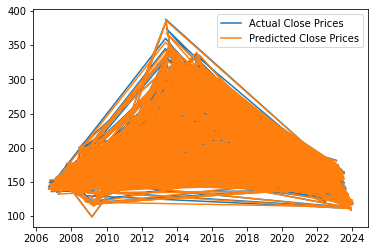

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
# Assuming df_final is prepared with necessary features

# Select relevant features
#features = ['Open', 'High', 'Low', 'Volume', 'Annual Average Inflation', 'Earnings Per Share']

# Create feature matrix (X) and target variable (y)
X = df_final.drop(['Close'], axis=1)
y = df_final['Close']  # Assuming 'Close' is the target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}')

# Visualization
plt.plot(y_test.index, y_test, label='Actual Close Prices')
plt.plot(y_test.index, y_pred, label='Predicted Close Prices')
plt.legend()
plt.show()


In [30]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming df_final is your preprocessed DataFrame

# Features (X) and Target variable (y)
X = df_final.drop(['Close'], axis=1)  
y = df_final['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using SelectKBest with f_regression
num_features_to_select = 10  # You can adjust this based on your preference or use a more sophisticated method
selector = SelectKBest(score_func=f_regression, k=num_features_to_select)
X_train_selected = selector.fit_transform(X_train, y_train)

# Get selected feature names
selected_feature_names = X.columns[selector.get_support()]

# Train a linear regression model on the selected features
model = LinearRegression()
model.fit(X_train_selected, y_train)

# Evaluate the model on the test set
X_test_selected = X_test[selected_feature_names]
y_pred = model.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)

# Print the selected features and mean squared error
print("Selected Features:", selected_feature_names)
print("Mean Squared Error:", mse)


Selected Features: Index(['Open', 'High', 'Low', 'Average', 'Volume', 'Annual Average Inflation',
       '12-Month Inflation', 'Mean', 'Amount', 'Earnings Per Share'],
      dtype='object')
Mean Squared Error: 5.355425799413931
